# Análisis y procesamiento de señales - Trabajo semanal Nº4
# Aramayo Yohana Valentina #


Se pide:

1) Realizar una tabla por cada SNR, que describa el sesgo y la varianza de cada estimador para cada ventana analizada. Recuerde incluir las ventanas rectangular (sin ventana), flattop y blackmanharris y otras que considere.

Bonus:
💎 Analice el efecto del zero-padding para el estimador Ω^1
 

# SNR = 3 #

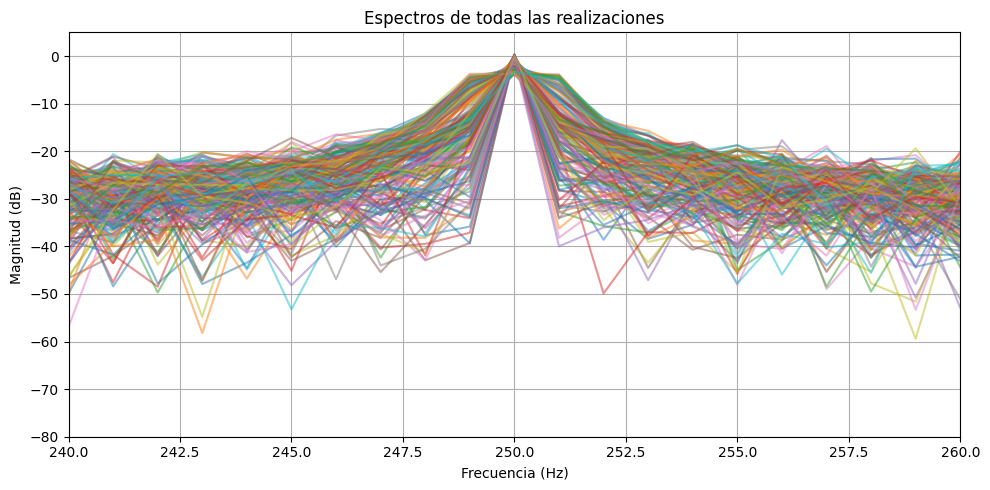

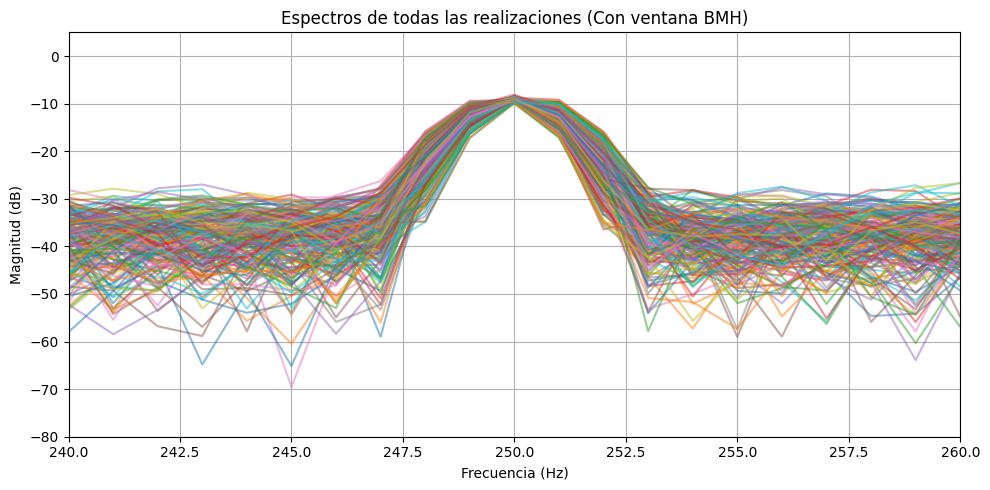

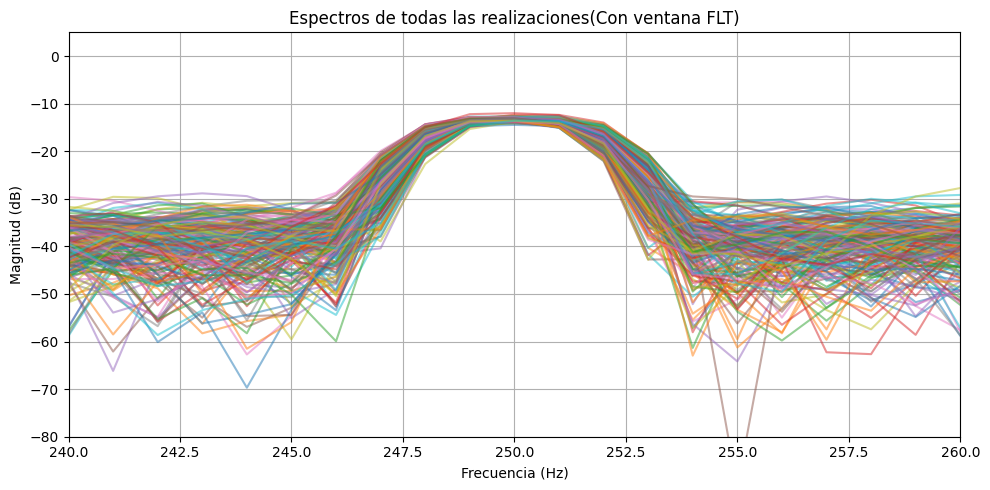

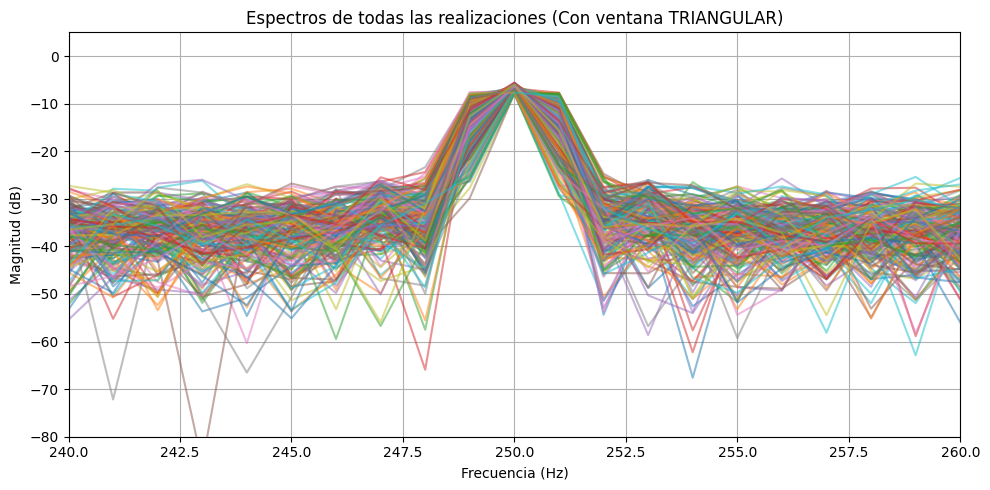

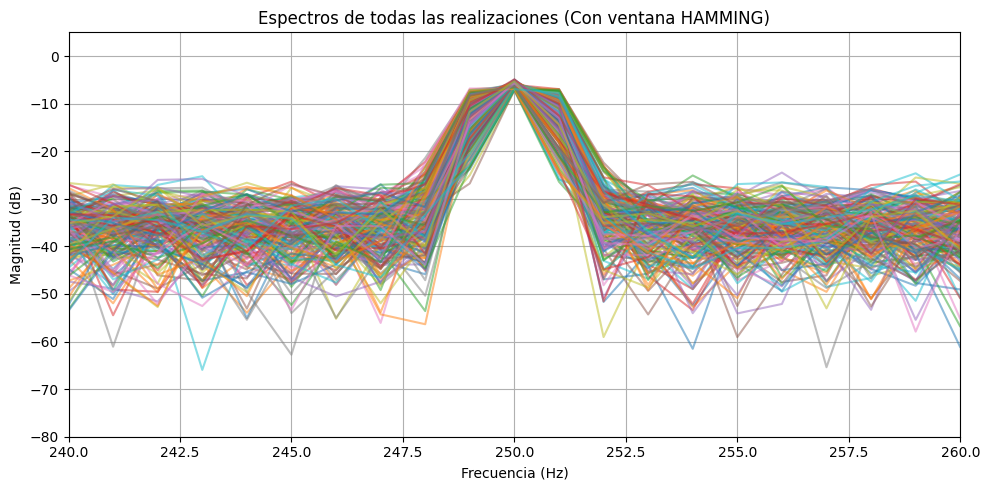

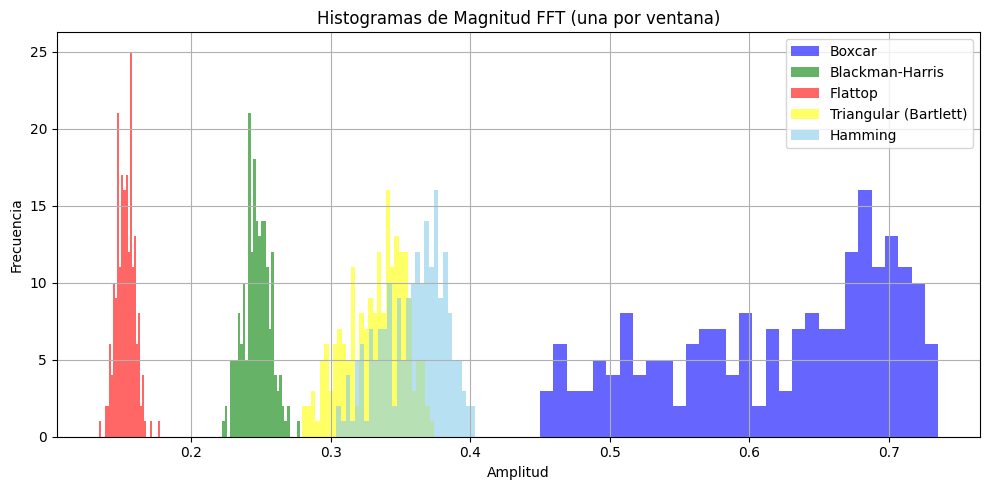

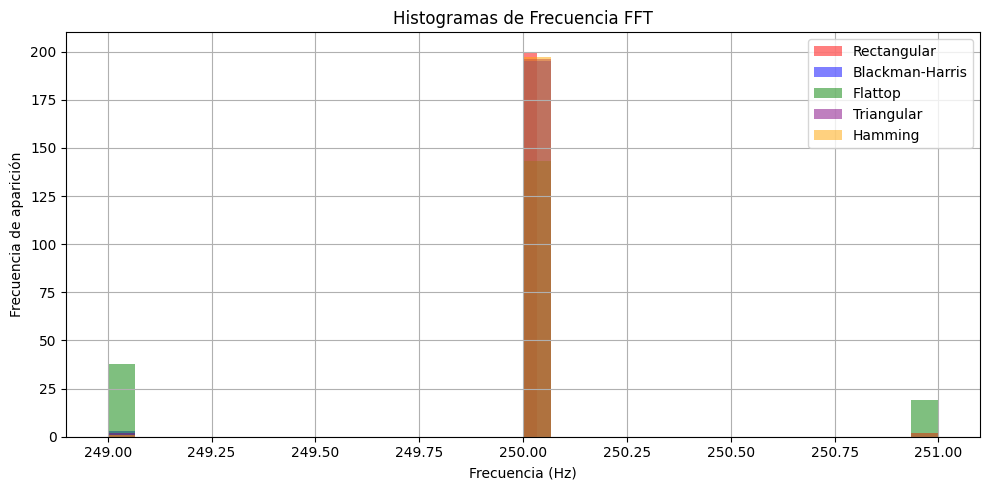

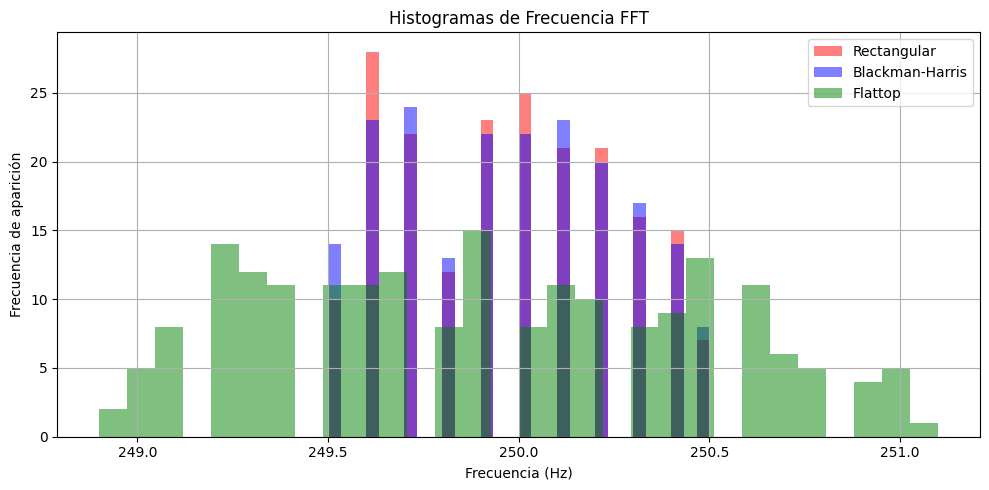

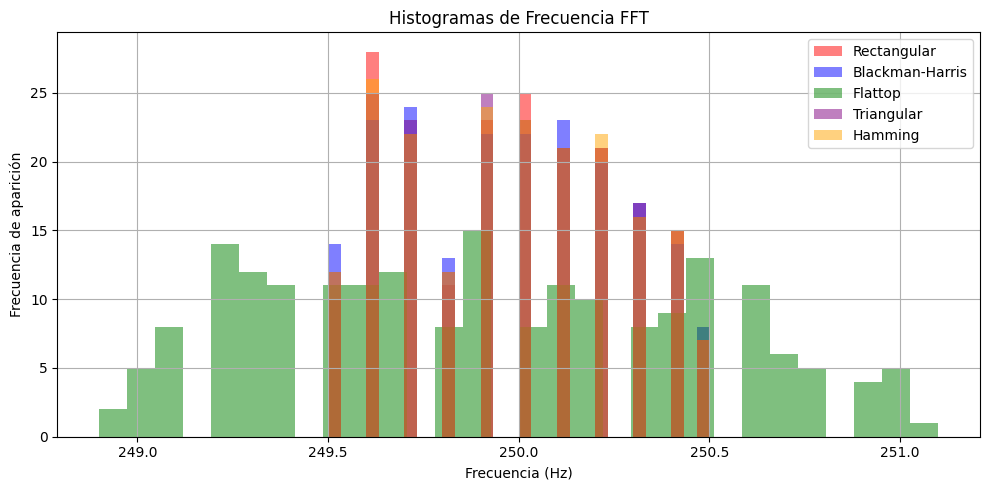

In [13]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 17 16:32:16 2025

@author: Valentina Aramayo
"""
#%% Importación de librerias

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import pandas as pd
#from scipy.fft import fft, fftshift  # Corrección en la importación

#%% Función para graficar los espectros 
def graficar_espectros(fft_data, frecs, bfrec, titulo, label=None, alpha=0.5, linestyle='-', color=None):
    """
    Grafica el espectro en dB para múltiples realizaciones.

    Parámetros:
        fft_data: ndarray con datos de FFT (N, R)
        frecs: vector de frecuencias
        bfrec: máscara booleana para frecuencias hasta fs/2
        titulo: título del gráfico
        label: etiqueta para la leyenda (solo se muestra una vez)
        alpha: transparencia de las curvas
        linestyle: estilo de línea
        color: color de las líneas (opcional)
    """
    plt.figure(figsize=(10, 5))
    plt.xlim(240, 260)
    plt.ylim(-80, 5)
    R = fft_data.shape[1]
    for i in range(R):
        plt.plot(
            frecs[bfrec],
            10 * np.log10(2 * np.abs(fft_data[bfrec, i])**2),
            alpha=alpha,
            linestyle=linestyle,
            label=label if i == 0 else "",
            color=color
        )
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud (dB)")
    plt.title(titulo)
    if label:
        plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

#%%
def graficar_histogramas_frecuencias(diccionario_frecuencias, bins=30, titulo='Histogramas de Frecuencia FFT'):
    """
    Grafica histogramas superpuestos de frecuencias dominantes para distintas ventanas.

    Parámetros:
        diccionario_frecuencias: diccionario con el nombre de la ventana como clave y
                                  un array con las frecuencias dominantes como valor.
                                  Ejemplo: {"Rectangular": omega1_BOX, "BMH": omega1_BMH}
        bins: cantidad de bins del histograma
        titulo: título del gráfico
    """
    plt.figure(figsize=(10, 5))
    
    colores = ['red', 'blue', 'green', 'purple', 'orange']
    for i, (nombre, datos_frecuencia) in enumerate(diccionario_frecuencias.items()):
        plt.hist(datos_frecuencia, bins=bins, alpha=0.5, label=nombre, color=colores[i % len(colores)])
    
    plt.title(titulo)
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Frecuencia de aparición")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#%% Datos de la simulación
fs = 1000  # Frecuencia de muestreo (Hz)
N = 1000   # Cantidad de muestras
df=fs/N #resolución espectral
ts=1/fs #tiempo de muestro
SNR= 3 #db
R=200 #Número de pruebas (Realizaciones)
omega_0= fs/4 # hay que poner despues fs/4
a1=np.sqrt(2)

#%%
fr= np.random.uniform (-1/2, 1/2, size=(1,R))
omega_1= omega_0 + fr*(df)
tt = np.linspace(0, (N-1)*ts, N).reshape(N, 1)  # (1000, 1)
vtt = np.tile(tt, (1, R))  # (1000, 10)
# Para el zero padding

#%% Señales
#Matriz de senoidales
señal_analogica = a1*np.sin(2*np.pi*omega_1*vtt)  # Dimensión (1000, 10)
#Ruido
potencia_nn=10**(-SNR/10)
sigma= np.sqrt(potencia_nn)
nn= np.random.normal(0, sigma, size=(N,R))

#%% Señal con ruido 
xk= señal_analogica + nn

#%%  Fast Fourier Transform
xk_fft= np.fft.fft(xk, axis=0)/N #hacemos fft por columnas
ff=np.linspace(0, (N-1)*df, N)
bfrec = ff <= fs/2  

#%% Señales con y sin ventana 

#Sin ventana
xk_sin_ventana = señal_analogica + nn

#Blackmanharris
ventana_BMH = sig.windows.blackmanharris(N).reshape(N, 1)
xk_con_ventana_BMH = xk_sin_ventana*ventana_BMH

#Flattop
ventana_FLT = sig.windows.flattop(N).reshape(N, 1)
xk_con_ventana_FLT= xk_sin_ventana*ventana_FLT

#Triangular o de Barlett
ventana_TRI = sig.windows.bartlett(N).reshape(N, 1)
xk_con_ventana_TRI= xk_sin_ventana*ventana_TRI

#Hamming
ventana_HMG = sig.windows.hamming(N).reshape(N, 1)
xk_con_ventana_HMG= xk_sin_ventana*ventana_HMG

#%% FFTs con ventana
fft_con_ventana_BMH = np.fft.fft(xk_con_ventana_BMH, axis=0) / N
fft_con_ventana_FLT = np.fft.fft(xk_con_ventana_FLT, axis=0) / N
fft_con_ventana_TRI = np.fft.fft(xk_con_ventana_TRI, axis=0) / N
fft_con_ventana_HMG = np.fft.fft(xk_con_ventana_HMG, axis=0) / N

#%% Llamar a la función para que grafique los espectros
graficar_espectros(xk_fft, ff, bfrec, "Espectros de todas las realizaciones")
graficar_espectros(fft_con_ventana_BMH, ff, bfrec, "Espectros de todas las realizaciones (Con ventana BMH)")
graficar_espectros(fft_con_ventana_FLT, ff, bfrec, "Espectros de todas las realizaciones(Con ventana FLT)")
graficar_espectros(fft_con_ventana_TRI, ff, bfrec, "Espectros de todas las realizaciones (Con ventana TRIANGULAR)")
graficar_espectros(fft_con_ventana_HMG, ff, bfrec, "Espectros de todas las realizaciones (Con ventana HAMMING)")

#%% Sin zero padding

final_BOX = np.abs(xk_fft[bfrec,:])
final_BMH= np.abs(fft_con_ventana_BMH[bfrec,:])
final_FLT = np.abs(fft_con_ventana_FLT[bfrec,:])
final_TRI = np.abs(fft_con_ventana_TRI[bfrec,:])
final_HMG = np.abs(fft_con_ventana_HMG[bfrec,:])

# Estimador de amplitud
a_gorro_1= final_BOX[250] # vector para quitar la feta
a_gorro_2= final_BMH[250]
a_gorro_3= final_FLT[250]
a_gorro_4= final_TRI[250]
a_gorro_5= final_HMG[250]
A_GORRO = np.array([a_gorro_1, a_gorro_2, a_gorro_3, a_gorro_4, a_gorro_5])  # También da (3, 200)

# Etiquetas para cada conjunto
labels = ['Boxcar', 'Flattop', 'Blackman-Harris', 'Triangular (Bartlett)', 'Hamming' ]
# Graficar los 3 histogramas superpuestos
plt.figure(figsize=(10, 5))
plt.hist(a_gorro_1, bins=30, label='Boxcar', color='blue', alpha=0.6)
plt.hist(a_gorro_2, bins=30, label='Blackman-Harris', color='green', alpha=0.6)
plt.hist(a_gorro_3, bins=30, label='Flattop', color='red', alpha=0.6)
plt.hist(a_gorro_4, bins=30, label='Triangular (Bartlett)', color='yellow', alpha=0.6)
plt.hist(a_gorro_5, bins=30, label='Hamming', color='skyblue', alpha=0.6)

plt.title('Histogramas de Magnitud FFT (una por ventana)')
plt.xlabel('Amplitud')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Sesgo y varianza del estimador
sesgo1_amplitud= np.mean(a_gorro_1) - a1 
sesgo2_amplitud= np.mean(a_gorro_2) - a1
sesgo3_amplitud= np.mean(a_gorro_3) - a1
sesgo4_amplitud= np.mean(a_gorro_4) - a1
sesgo5_amplitud= np.mean(a_gorro_5) - a1

# Varianza
V1_amplitud= np.var(a_gorro_1) 
V2_amplitud= np.var(a_gorro_2)
V3_amplitud= np.var(a_gorro_3)
V4_amplitud= np.var(a_gorro_4)
V5_amplitud= np.var(a_gorro_5)


# ESTIMADOR DE FRECUENCIA
omega1_BOX= np.argmax(final_BOX, axis=0)*df # vector para quitar la feta
omega1_BMH= np.argmax(final_BMH, axis=0)*df
omega1_FLT= np.argmax(final_FLT, axis=0)*df
omega1_TRI= np.argmax(final_TRI, axis=0)*df
omega1_HMG= np.argmax(final_HMG, axis=0)*df

# Graficar los histogramas superpuestos
histogramas_dict = {
    "Rectangular": omega1_BOX,
    "Blackman-Harris": omega1_BMH,
    "Flattop": omega1_FLT,
    "Triangular": omega1_TRI,
    "Hamming": omega1_HMG
}

graficar_histogramas_frecuencias(histogramas_dict)
# Sesgo y varianza
sesgo1_a= np.mean(omega1_BOX) -  np.mean(omega_1) 
sesgo2_a= np.mean(omega1_BMH) - np.mean(omega_1)
sesgo3_a= np.mean(omega1_FLT) - np.mean(omega_1 )
sesgo4_a= np.mean(omega1_TRI) - np.mean(omega_1 )
sesgo5_a= np.mean(omega1_HMG) - np.mean(omega_1 )

V1_a= np.var(omega1_BOX) #Aca deberia ver si se condice con lo que habia dicho el profe que era la varianza
V2_a= np.var(omega1_BMH)
V3_a= np.var(omega1_FLT)
V4_a= np.var(omega1_TRI)
V5_a= np.var(omega1_HMG)

sesgo1_b= np.mean(omega1_BOX - omega_1.flatten())
sesgo2_b= np.mean(omega1_BMH - omega_1.flatten())
sesgo3_b= np.mean(omega1_FLT - omega_1.flatten())
sesgo4_b= np.mean(omega1_TRI - omega_1.flatten())
sesgo5_b= np.mean(omega1_HMG - omega_1.flatten())
#%% CON ZERO PADDING

n=10*N
fft_sin_ventana_pad= np.fft.fft(xk_sin_ventana, n,axis=0)/ N
fft_con_ventana_BMH_pad = np.fft.fft(xk_con_ventana_BMH, n,axis=0)/ N
fft_con_ventana_FLT_pad = np.fft.fft(xk_con_ventana_FLT, n,axis=0)/ N
fft_con_ventana_TRI_pad = np.fft.fft(xk_con_ventana_TRI, n,axis=0)/ N
fft_con_ventana_HMG_pad = np.fft.fft(xk_con_ventana_HMG, n,axis=0)/ N

#Frecuencias
M=10000
df_pad=fs/M
ff_m = np.linspace(0, (M-1)*df_pad, M)
bfrec_m = ff_m <= fs / 2

#
final_BOX_pad = np.abs(fft_sin_ventana_pad[bfrec_m,:])
final_BMH_pad = np.abs(fft_con_ventana_BMH_pad[bfrec_m,:])
final_FLT_pad = np.abs(fft_con_ventana_FLT_pad[bfrec_m,:])
final_TRI_pad = np.abs(fft_con_ventana_TRI_pad[bfrec_m,:])
final_HMG_pad = np.abs(fft_con_ventana_HMG_pad [bfrec_m,:])

omega1_BOX_pad= np.argmax(final_BOX_pad , axis=0)*df_pad 
omega1_BMH_pad= np.argmax(final_BMH_pad , axis=0)*df_pad
omega1_FLT_pad= np.argmax(final_FLT_pad , axis=0)*df_pad
omega1_TRI_pad= np.argmax(final_TRI_pad , axis=0)*df_pad
omega1_HMG_pad= np.argmax(final_HMG_pad , axis=0)*df_pad

# Graficar los histogramas superpuestos
histogramas_dict = {
    "Rectangular": omega1_BOX_pad,
    "Blackman-Harris": omega1_BMH_pad,
    "Flattop": omega1_FLT_pad
}

graficar_histogramas_frecuencias(histogramas_dict)

histogramas_dict = {
    "Rectangular": omega1_BOX_pad,
    "Blackman-Harris": omega1_BMH_pad,
    "Flattop": omega1_FLT_pad,
    "Triangular": omega1_TRI_pad,
    "Hamming": omega1_HMG_pad
}

graficar_histogramas_frecuencias(histogramas_dict)

#Sesgo - Forma 1 (Método a)

sesgo1_pad_a= np.mean(omega1_BOX_pad) -  np.mean(omega_1) #Acá no se si tengo que corregir que el vtt tambien sea con el zero padding
sesgo2_pad_a= np.mean(omega1_BMH_pad) - np.mean(omega_1)
sesgo3_pad_a= np.mean(omega1_FLT_pad) - np.mean(omega_1)
sesgo4_pad_a= np.mean(omega1_TRI_pad) - np.mean(omega_1)
sesgo5_pad_a= np.mean(omega1_HMG_pad) - np.mean(omega_1)
#Sesgo - Forma 2

sesgo1_pad_b = np.mean(omega1_BOX_pad - omega_1.flatten())
sesgo2_pad_b = np.mean(omega1_BMH_pad - omega_1.flatten())
sesgo3_pad_b = np.mean(omega1_FLT_pad - omega_1.flatten())
sesgo4_pad_b = np.mean(omega1_TRI_pad - omega_1.flatten())
sesgo5_pad_b = np.mean(omega1_HMG_pad - omega_1.flatten())

#Varianza
V1_pad_a= np.var(omega1_BOX_pad) #Aca deberia ver si se condice con lo que habia dicho el profe que era la varianza
V2_pad_a= np.var(omega1_BMH_pad)
V3_pad_a= np.var(omega1_FLT_pad)
V4_pad_a= np.var(omega1_TRI_pad)
V5_pad_a= np.var(omega1_HMG_pad)

In [14]:
#%%HACER UNA TABLA PARA SESGO Y VARIANZA DE FRECUENCIA 
tabla1 = pd.DataFrame({
 "Sesgo Amplitud ": [sesgo1_amplitud, sesgo2_amplitud, sesgo3_amplitud, sesgo4_amplitud, sesgo5_amplitud],
 "Varianza Amplitud ":[V1_amplitud, V2_amplitud, V3_amplitud, V4_amplitud, V5_amplitud],
}, index=["Boxcar","Blackman-Harris", "Flat-top", "Triangular (Bartlett)", "Hamming"])
tabla1.style.set_caption("Tabla de Sesgo y Varianza para la amplitud") \
     .format("{:.16f}") \
     .set_table_styles([{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}])


In [15]:
#%%HACER UNA TABLA PARA LAS FORMAS DE SESGOS

tabla2 = pd.DataFrame({
# "Sesgo Amplitud ": [sesgo_a_BHK_2, sesgo_a_FLT_2, sesgo_a_BOX_2, sesgo_a_TRA_2, sesgo_a_NUT_2],
# "Varianza Amplitud ":[varianza_a_BHK_2,varianza_a_FLT_2,varianza_a_BOX_2,varianza_a_TRA_2,varianza_a_NUT_2],
 "Sesgo Frecuencia s/padding A":[sesgo1_a, sesgo2_a, sesgo3_a, sesgo4_a, sesgo5_a],
 "Sesgo Frecuencia c/padding A":[sesgo1_pad_a, sesgo2_pad_a, sesgo3_pad_a, sesgo4_pad_a, sesgo5_pad_a],
 "Sesgo Frecuencia s/padding B":[sesgo1_b, sesgo2_b, sesgo3_b, sesgo4_b, sesgo5_b],
 "Sesgo Frecuencia c/padding B":[sesgo1_pad_b, sesgo2_pad_b, sesgo3_pad_b, sesgo4_pad_b, sesgo5_pad_b],
 }, index=["Boxcar","Blackman-Harris", "Flat-top", "Triangular (Bartlett)", "Hamming"])
tabla2.style.set_caption("Tabla de Sesgo calculado de dos formas") \
     .format("{:.16f}") \
     .set_table_styles([{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}])


## Nota ##
Se calculó el sesgo del estimador de frecuencia de dos maneras distintas pero como ambas dan muy parecidas me quedé con la forma A

In [16]:
tabla3 = pd.DataFrame({
# "Sesgo Amplitud ": [sesgo_a_BHK_2, sesgo_a_FLT_2, sesgo_a_BOX_2, sesgo_a_TRA_2, sesgo_a_NUT_2],
# "Varianza Amplitud ":[varianza_a_BHK_2,varianza_a_FLT_2,varianza_a_BOX_2,varianza_a_TRA_2,varianza_a_NUT_2],
 "Sesgo Frecuencia s/padding":[sesgo1_a, sesgo2_a, sesgo3_a, sesgo4_a, sesgo5_a],
 "Sesgo Frecuencia c/padding":[sesgo1_pad_a, sesgo2_pad_a, sesgo3_pad_a, sesgo4_pad_a, sesgo5_pad_a],
 "Varianza Frecuencia s/padding":[V1_a,V2_a,V3_a, V4_a, V5_a],
 "Varianza Frecuencia c/padding":[V1_pad_a,V2_pad_a,V3_pad_a, V4_pad_a, V5_pad_a]
 }, index=["Boxcar","Blackman-Harris", "Flat-top", "Triangular (Bartlett)", "Hamming"])
tabla3.style.set_caption("Tabla de Sesgo y Varianza por Ventana con SNR = 3dB") \
     .format("{:.16f}") \
     .set_table_styles([{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}])


# SNR = 10 #

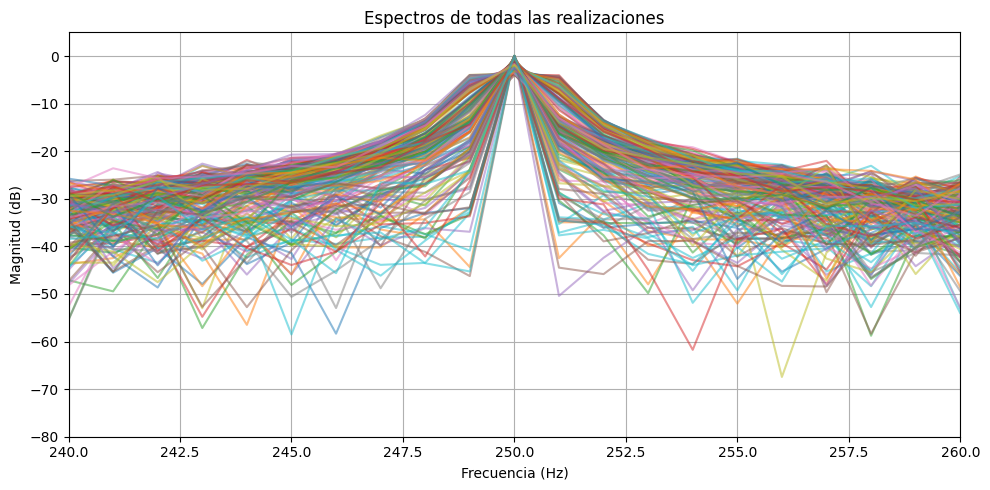

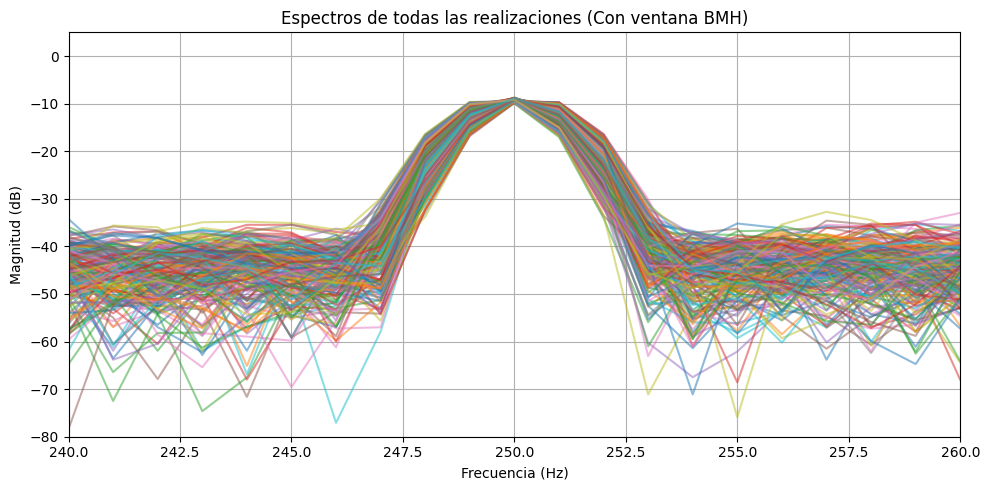

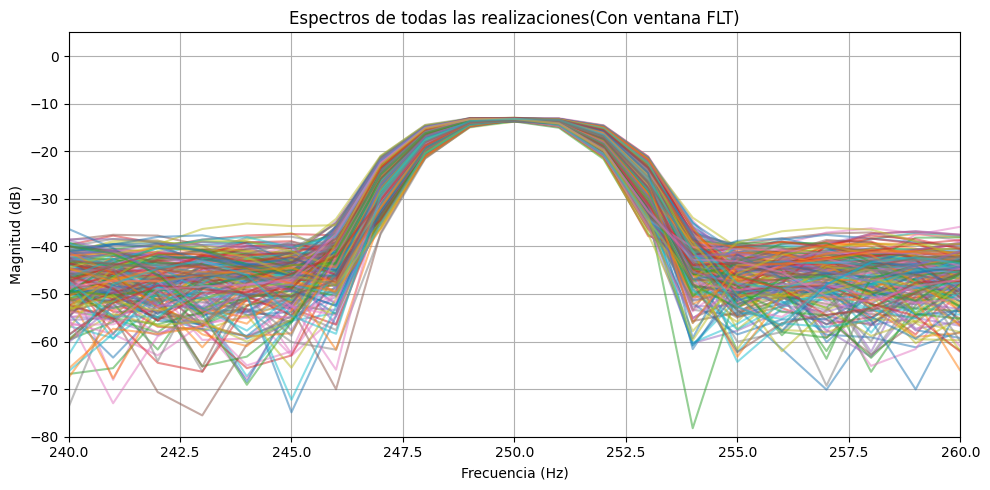

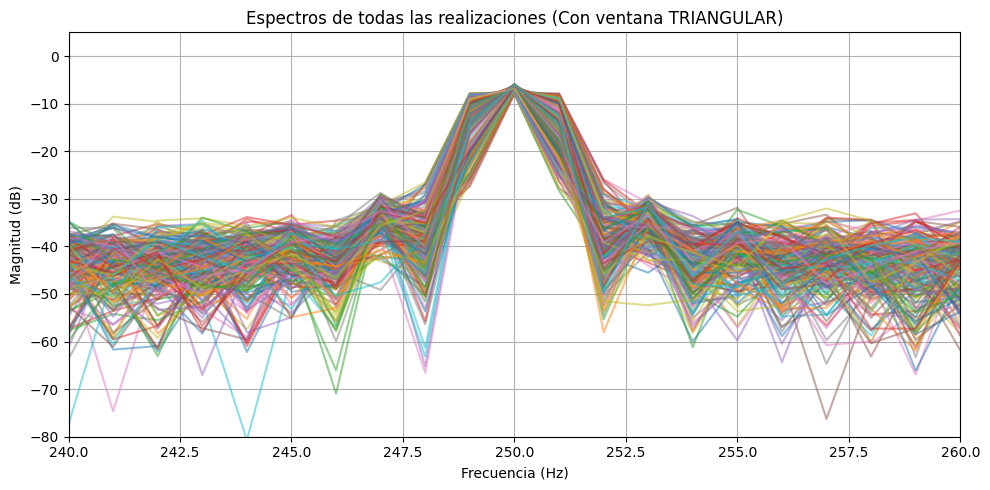

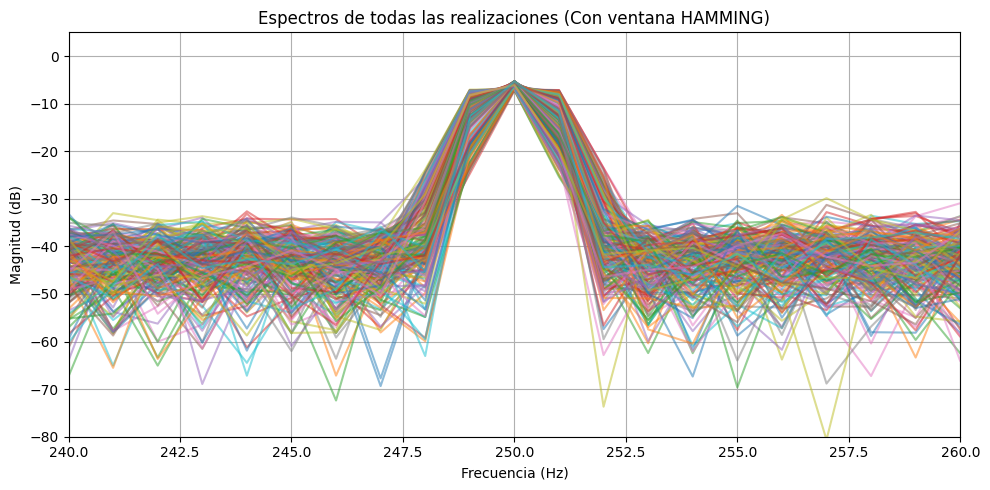

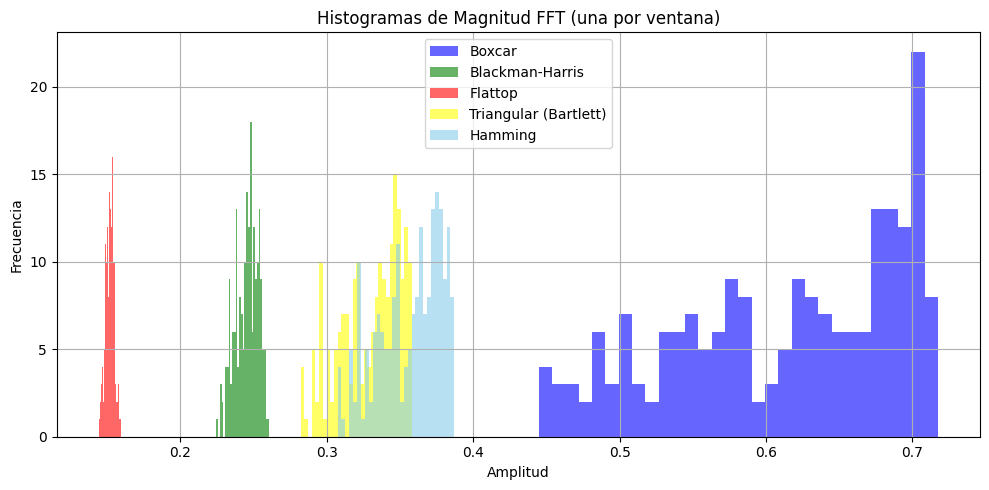

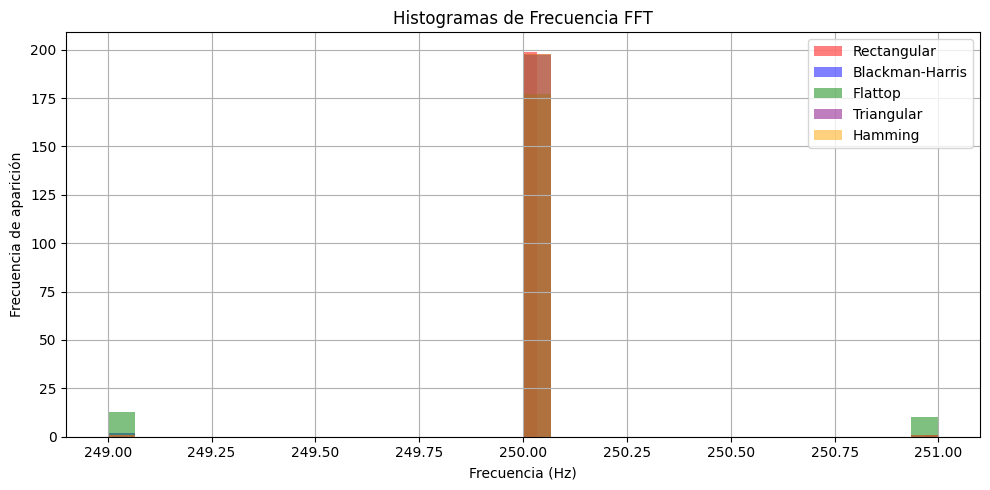

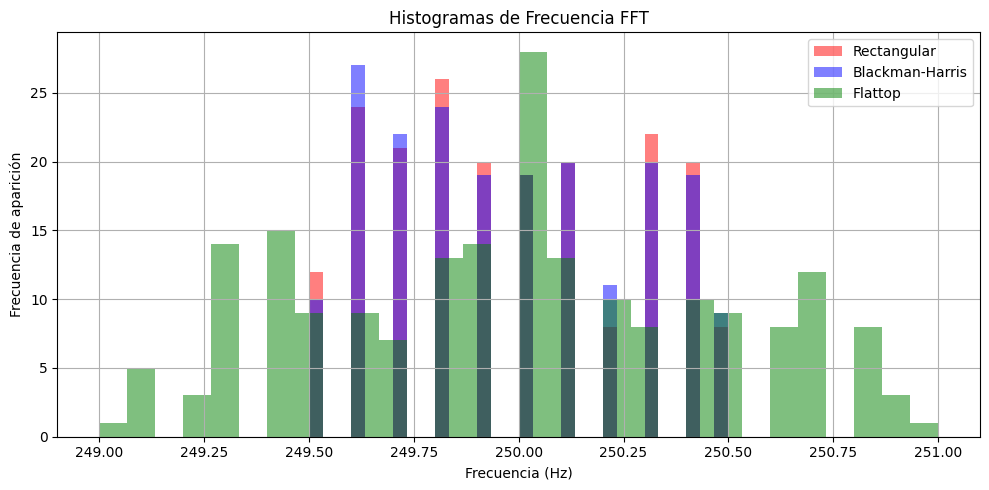

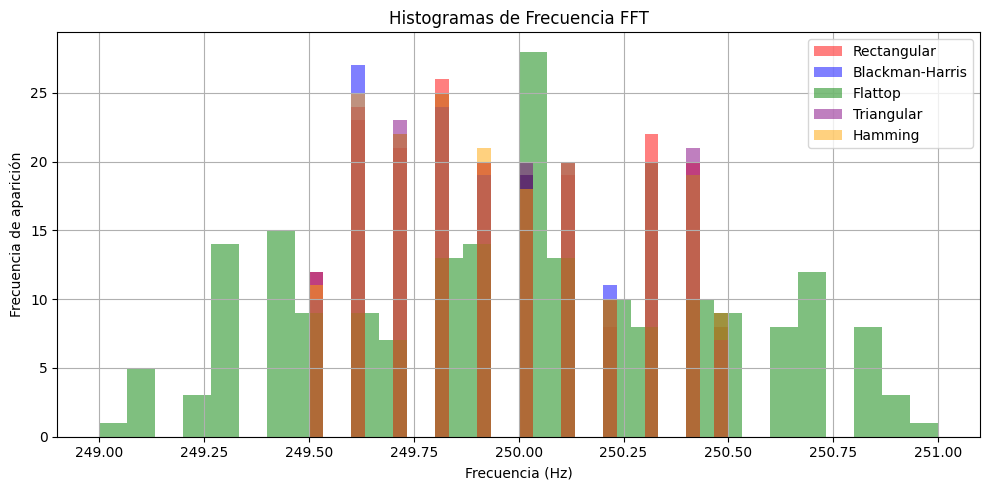

In [17]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 19 18:34:32 2025

@author: Usuario
"""

# -*- coding: utf-8 -*-
"""
Created on Thu Apr 17 16:32:16 2025

@author: Valentina Aramayo
"""
#%% Importación de librerias

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import pandas as pd
#from scipy.fft import fft, fftshift  # Corrección en la importación

#%% Función para graficar los espectros 
def graficar_espectros(fft_data, frecs, bfrec, titulo, label=None, alpha=0.5, linestyle='-', color=None):
    """
    Grafica el espectro en dB para múltiples realizaciones.

    Parámetros:
        fft_data: ndarray con datos de FFT (N, R)
        frecs: vector de frecuencias
        bfrec: máscara booleana para frecuencias hasta fs/2
        titulo: título del gráfico
        label: etiqueta para la leyenda (solo se muestra una vez)
        alpha: transparencia de las curvas
        linestyle: estilo de línea
        color: color de las líneas (opcional)
    """
    plt.figure(figsize=(10, 5))
    plt.xlim(240, 260)
    plt.ylim(-80, 5)
    R = fft_data.shape[1]
    for i in range(R):
        plt.plot(
            frecs[bfrec],
            10 * np.log10(2 * np.abs(fft_data[bfrec, i])**2),
            alpha=alpha,
            linestyle=linestyle,
            label=label if i == 0 else "",
            color=color
        )
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud (dB)")
    plt.title(titulo)
    if label:
        plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

#%%
def graficar_histogramas_frecuencias(diccionario_frecuencias, bins=30, titulo='Histogramas de Frecuencia FFT'):
    """
    Grafica histogramas superpuestos de frecuencias dominantes para distintas ventanas.

    Parámetros:
        diccionario_frecuencias: diccionario con el nombre de la ventana como clave y
                                  un array con las frecuencias dominantes como valor.
                                  Ejemplo: {"Rectangular": omega1_BOX, "BMH": omega1_BMH}
        bins: cantidad de bins del histograma
        titulo: título del gráfico
    """
    plt.figure(figsize=(10, 5))
    
    colores = ['red', 'blue', 'green', 'purple', 'orange']
    for i, (nombre, datos_frecuencia) in enumerate(diccionario_frecuencias.items()):
        plt.hist(datos_frecuencia, bins=bins, alpha=0.5, label=nombre, color=colores[i % len(colores)])
    
    plt.title(titulo)
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Frecuencia de aparición")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#%% Datos de la simulación
fs = 1000  # Frecuencia de muestreo (Hz)
N = 1000   # Cantidad de muestras
df=fs/N #resolución espectral
ts=1/fs #tiempo de muestro
SNR= 10 #db
R=200 #Número de pruebas (Realizaciones)
omega_0= fs/4 # hay que poner despues fs/4
a1=np.sqrt(2)

#%%
fr= np.random.uniform (-1/2, 1/2, size=(1,R))
omega_1= omega_0 + fr*(df)
tt = np.linspace(0, (N-1)*ts, N).reshape(N, 1)  # (1000, 1)
vtt = np.tile(tt, (1, R))  # (1000, 10)
# Para el zero padding

#%% Señales
#Matriz de senoidales
señal_analogica = a1*np.sin(2*np.pi*omega_1*vtt)  # Dimensión (1000, 10)
#Ruido
potencia_nn=10**(-SNR/10)
sigma= np.sqrt(potencia_nn)
nn= np.random.normal(0, sigma, size=(N,R))

#%% Señal con ruido 
xk= señal_analogica + nn

#%%  Fast Fourier Transform
xk_fft= np.fft.fft(xk, axis=0)/N #hacemos fft por columnas
ff=np.linspace(0, (N-1)*df, N)
bfrec = ff <= fs/2  

#%% Señales con y sin ventana 

#Sin ventana
xk_sin_ventana = señal_analogica + nn

#Blackmanharris
ventana_BMH = sig.windows.blackmanharris(N).reshape(N, 1)
xk_con_ventana_BMH = xk_sin_ventana*ventana_BMH

#Flattop
ventana_FLT = sig.windows.flattop(N).reshape(N, 1)
xk_con_ventana_FLT= xk_sin_ventana*ventana_FLT

#Triangular o de Barlett
ventana_TRI = sig.windows.bartlett(N).reshape(N, 1)
xk_con_ventana_TRI= xk_sin_ventana*ventana_TRI

#Hamming
ventana_HMG = sig.windows.hamming(N).reshape(N, 1)
xk_con_ventana_HMG= xk_sin_ventana*ventana_HMG

#%% FFTs con ventana
fft_con_ventana_BMH = np.fft.fft(xk_con_ventana_BMH, axis=0) / N
fft_con_ventana_FLT = np.fft.fft(xk_con_ventana_FLT, axis=0) / N
fft_con_ventana_TRI = np.fft.fft(xk_con_ventana_TRI, axis=0) / N
fft_con_ventana_HMG = np.fft.fft(xk_con_ventana_HMG, axis=0) / N

#%% Llamar a la función para que grafique los espectros
graficar_espectros(xk_fft, ff, bfrec, "Espectros de todas las realizaciones")
graficar_espectros(fft_con_ventana_BMH, ff, bfrec, "Espectros de todas las realizaciones (Con ventana BMH)")
graficar_espectros(fft_con_ventana_FLT, ff, bfrec, "Espectros de todas las realizaciones(Con ventana FLT)")
graficar_espectros(fft_con_ventana_TRI, ff, bfrec, "Espectros de todas las realizaciones (Con ventana TRIANGULAR)")
graficar_espectros(fft_con_ventana_HMG, ff, bfrec, "Espectros de todas las realizaciones (Con ventana HAMMING)")

#%% Sin zero padding

final_BOX = np.abs(xk_fft[bfrec,:])
final_BMH= np.abs(fft_con_ventana_BMH[bfrec,:])
final_FLT = np.abs(fft_con_ventana_FLT[bfrec,:])
final_TRI = np.abs(fft_con_ventana_TRI[bfrec,:])
final_HMG = np.abs(fft_con_ventana_HMG[bfrec,:])

# Estimador de amplitud
a_gorro_1= final_BOX[250] # vector para quitar la feta
a_gorro_2= final_BMH[250]
a_gorro_3= final_FLT[250]
a_gorro_4= final_TRI[250]
a_gorro_5= final_HMG[250]
A_GORRO = np.array([a_gorro_1, a_gorro_2, a_gorro_3, a_gorro_4, a_gorro_5])  # También da (3, 200)

# Etiquetas para cada conjunto
labels = ['Boxcar', 'Flattop', 'Blackman-Harris', 'Triangular (Bartlett)', 'Hamming' ]
# Graficar los 3 histogramas superpuestos
plt.figure(figsize=(10, 5))
plt.hist(a_gorro_1, bins=30, label='Boxcar', color='blue', alpha=0.6)
plt.hist(a_gorro_2, bins=30, label='Blackman-Harris', color='green', alpha=0.6)
plt.hist(a_gorro_3, bins=30, label='Flattop', color='red', alpha=0.6)
plt.hist(a_gorro_4, bins=30, label='Triangular (Bartlett)', color='yellow', alpha=0.6)
plt.hist(a_gorro_5, bins=30, label='Hamming', color='skyblue', alpha=0.6)

plt.title('Histogramas de Magnitud FFT (una por ventana)')
plt.xlabel('Amplitud')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Sesgo y varianza del estimador
sesgo1_amplitud= np.mean(a_gorro_1) - a1 
sesgo2_amplitud= np.mean(a_gorro_2) - a1
sesgo3_amplitud= np.mean(a_gorro_3) - a1
sesgo4_amplitud= np.mean(a_gorro_4) - a1
sesgo5_amplitud= np.mean(a_gorro_5) - a1

# Varianza
V1_amplitud= np.var(a_gorro_1) 
V2_amplitud= np.var(a_gorro_2)
V3_amplitud= np.var(a_gorro_3)
V4_amplitud= np.var(a_gorro_4)
V5_amplitud= np.var(a_gorro_5)


# ESTIMADOR DE FRECUENCIA
omega1_BOX= np.argmax(final_BOX, axis=0)*df # vector para quitar la feta
omega1_BMH= np.argmax(final_BMH, axis=0)*df
omega1_FLT= np.argmax(final_FLT, axis=0)*df
omega1_TRI= np.argmax(final_TRI, axis=0)*df
omega1_HMG= np.argmax(final_HMG, axis=0)*df



# Graficar los histogramas superpuestos
histogramas_dict = {
    "Rectangular": omega1_BOX,
    "Blackman-Harris": omega1_BMH,
    "Flattop": omega1_FLT,
    "Triangular": omega1_TRI,
    "Hamming": omega1_HMG
}

graficar_histogramas_frecuencias(histogramas_dict)
# Sesgo y varianza
sesgo1_a= np.mean(omega1_BOX) -  np.mean(omega_1) 
sesgo2_a= np.mean(omega1_BMH) - np.mean(omega_1)
sesgo3_a= np.mean(omega1_FLT) - np.mean(omega_1 )
sesgo4_a= np.mean(omega1_TRI) - np.mean(omega_1 )
sesgo5_a= np.mean(omega1_HMG) - np.mean(omega_1 )

V1_a= np.var(omega1_BOX) #Aca deberia ver si se condice con lo que habia dicho el profe que era la varianza
V2_a= np.var(omega1_BMH)
V3_a= np.var(omega1_FLT)
V4_a= np.var(omega1_TRI)
V5_a= np.var(omega1_HMG)

sesgo1_b= np.mean(omega1_BOX - omega_1.flatten())
sesgo2_b= np.mean(omega1_BMH - omega_1.flatten())
sesgo3_b= np.mean(omega1_FLT - omega_1.flatten())
sesgo4_b= np.mean(omega1_TRI - omega_1.flatten())
sesgo5_b= np.mean(omega1_HMG - omega_1.flatten())
#%% CON ZERO PADDING

n=10*N
fft_sin_ventana_pad= np.fft.fft(xk_sin_ventana, n,axis=0)/ N
fft_con_ventana_BMH_pad = np.fft.fft(xk_con_ventana_BMH, n,axis=0)/ N
fft_con_ventana_FLT_pad = np.fft.fft(xk_con_ventana_FLT, n,axis=0)/ N
fft_con_ventana_TRI_pad = np.fft.fft(xk_con_ventana_TRI, n,axis=0)/ N
fft_con_ventana_HMG_pad = np.fft.fft(xk_con_ventana_HMG, n,axis=0)/ N

#Frecuencias
M=10000
df_pad=fs/M
ff_m = np.linspace(0, (M-1)*df_pad, M)
bfrec_m = ff_m <= fs / 2

#
final_BOX_pad = np.abs(fft_sin_ventana_pad[bfrec_m,:])
final_BMH_pad = np.abs(fft_con_ventana_BMH_pad[bfrec_m,:])
final_FLT_pad = np.abs(fft_con_ventana_FLT_pad[bfrec_m,:])
final_TRI_pad = np.abs(fft_con_ventana_TRI_pad[bfrec_m,:])
final_HMG_pad = np.abs(fft_con_ventana_HMG_pad [bfrec_m,:])

omega1_BOX_pad= np.argmax(final_BOX_pad , axis=0)*df_pad 
omega1_BMH_pad= np.argmax(final_BMH_pad , axis=0)*df_pad
omega1_FLT_pad= np.argmax(final_FLT_pad , axis=0)*df_pad
omega1_TRI_pad= np.argmax(final_TRI_pad , axis=0)*df_pad
omega1_HMG_pad= np.argmax(final_HMG_pad , axis=0)*df_pad

# Graficar los histogramas superpuestos
histogramas_dict = {
    "Rectangular": omega1_BOX_pad,
    "Blackman-Harris": omega1_BMH_pad,
    "Flattop": omega1_FLT_pad
}

graficar_histogramas_frecuencias(histogramas_dict, )

histogramas_dict = {
    "Rectangular": omega1_BOX_pad,
    "Blackman-Harris": omega1_BMH_pad,
    "Flattop": omega1_FLT_pad,
    "Triangular": omega1_TRI_pad,
    "Hamming": omega1_HMG_pad
}

graficar_histogramas_frecuencias(histogramas_dict)

#Sesgo - Forma 1 (Método a)

sesgo1_pad_a= np.mean(omega1_BOX_pad) -  np.mean(omega_1) #Acá no se si tengo que corregir que el vtt tambien sea con el zero padding
sesgo2_pad_a= np.mean(omega1_BMH_pad) - np.mean(omega_1)
sesgo3_pad_a= np.mean(omega1_FLT_pad) - np.mean(omega_1)
sesgo4_pad_a= np.mean(omega1_TRI_pad) - np.mean(omega_1)
sesgo5_pad_a= np.mean(omega1_HMG_pad) - np.mean(omega_1)
#Sesgo - Forma 2

sesgo1_pad_b = np.mean(omega1_BOX_pad - omega_1.flatten())
sesgo2_pad_b = np.mean(omega1_BMH_pad - omega_1.flatten())
sesgo3_pad_b = np.mean(omega1_FLT_pad - omega_1.flatten())
sesgo4_pad_b = np.mean(omega1_TRI_pad - omega_1.flatten())
sesgo5_pad_b = np.mean(omega1_HMG_pad - omega_1.flatten())

#Varianza
V1_pad_a= np.var(omega1_BOX_pad) #Aca deberia ver si se condice con lo que habia dicho el profe que era la varianza
V2_pad_a= np.var(omega1_BMH_pad)
V3_pad_a= np.var(omega1_FLT_pad)
V4_pad_a= np.var(omega1_TRI_pad)
V5_pad_a= np.var(omega1_HMG_pad)




In [18]:
#%%HACER UNA TABLA PARA SESGO Y VARIANZA DE FRECUENCIA 

tabla1 = pd.DataFrame({
 "Sesgo Amplitud ": [sesgo1_amplitud, sesgo2_amplitud, sesgo3_amplitud, sesgo4_amplitud, sesgo5_amplitud],
 "Varianza Amplitud ":[V1_amplitud, V2_amplitud, V3_amplitud, V4_amplitud, V5_amplitud],
}, index=["Boxcar","Blackman-Harris", "Flat-top", "Triangular (Bartlett)", "Hamming"])
tabla1.style.set_caption("Tabla de Sesgo y Varianza para la amplitud") \
     .format("{:.16f}") \
     .set_table_styles([{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}])




In [19]:
#%%HACER UNA TABLA PARA LAS FORMAS DE SESGOS

tabla2 = pd.DataFrame({
# "Sesgo Amplitud ": [sesgo_a_BHK_2, sesgo_a_FLT_2, sesgo_a_BOX_2, sesgo_a_TRA_2, sesgo_a_NUT_2],
# "Varianza Amplitud ":[varianza_a_BHK_2,varianza_a_FLT_2,varianza_a_BOX_2,varianza_a_TRA_2,varianza_a_NUT_2],
 "Sesgo Frecuencia s/padding A":[sesgo1_a, sesgo2_a, sesgo3_a, sesgo4_a, sesgo5_a],
 "Sesgo Frecuencia c/padding A":[sesgo1_pad_a, sesgo2_pad_a, sesgo3_pad_a, sesgo4_pad_a, sesgo5_pad_a],
 "Sesgo Frecuencia s/padding B":[sesgo1_b, sesgo2_b, sesgo3_b, sesgo4_b, sesgo5_b],
 "Sesgo Frecuencia c/padding B":[sesgo1_pad_b, sesgo2_pad_b, sesgo3_pad_b, sesgo4_pad_b, sesgo5_pad_b],
 }, index=["Boxcar","Blackman-Harris", "Flat-top", "Triangular (Bartlett)", "Hamming"])
tabla2.style.set_caption("Tabla de Sesgo calculado de dos formas") \
     .format("{:.16f}") \
     .set_table_styles([{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}])



## Nota ##
Se calculó el sesgo del estimador de frecuencia de dos maneras distintas pero como ambas dan muy parecidas me quedé con la forma A

In [20]:
#%%HACER UNA TABLA PARA SESGO Y VARIANZA DE FRECUENCIA 

tabla3 = pd.DataFrame({
# "Sesgo Amplitud ": [sesgo_a_BHK_2, sesgo_a_FLT_2, sesgo_a_BOX_2, sesgo_a_TRA_2, sesgo_a_NUT_2],
# "Varianza Amplitud ":[varianza_a_BHK_2,varianza_a_FLT_2,varianza_a_BOX_2,varianza_a_TRA_2,varianza_a_NUT_2],
 "Sesgo Frecuencia s/padding":[sesgo1_a, sesgo2_a, sesgo3_a, sesgo4_a, sesgo5_a],
 "Sesgo Frecuencia c/padding":[sesgo1_pad_a, sesgo2_pad_a, sesgo3_pad_a, sesgo4_pad_a, sesgo5_pad_a],
 "Varianza Frecuencia s/padding":[V1_a,V2_a,V3_a, V4_a, V5_a],
 "Varianza Frecuencia c/padding":[V1_pad_a,V2_pad_a,V3_pad_a, V4_pad_a, V5_pad_a]
 }, index=["Boxcar","Blackman-Harris", "Flat-top", "Triangular (Bartlett)", "Hamming"])
tabla3.style.set_caption("Tabla de Sesgo y Varianza por Ventana con SNR = 10dB") \
     .format("{:.16f}") \
     .set_table_styles([{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}])


# Análisis de los experimentos #
El objetivo de esta tarea semanal es estimar los parámetros de una señal, en particular su amplitud y frecuencia. Las estimaciones las haremos utilizando una herramienta fundamental en el análisis de espectros: las ventanas. Además de estimar veremos qué ventana es mejor para estimar cierto parámetro. 

En situaciones reales, los parámetros de una señal son desconocidos, por ejemplo, los correspondientes al ECG de una persona. En este caso, como estamos simulando una señal los parámetros de la señal son conocidos. Entonces, podemos definir qué ventana es mejor en cada caso debido a que podemos hacer cálculos de sesgo y varianza (estos cálculos requieren de conocer el valor verdadero de los parámetros).

Las ventanas utilizadas en esta tarea son: Rectangular, Blackman Harris, Flattop, Triangular, Hamming.

## SNR= 3 ##
### Análisis de estimación de amplitud de la señal
Al observar los histogramas de las amplitudes estimadas, se destaca que la ventana Flattop produce estimaciones más alejadas del valor real pero a su vez es la que menos dispersión de valores tiene. Por otra parte, los valores de amplitud obtenidos con ventana rectangular son más cercanos al real pero es el que más dispersión tiene.
Entonces, el mayor sesgo lo obtenemos con Flattop sin embargo su varianza es menor. En contrapartida, el menor sesgo se consigue con ventana rectangular pero al mismo tiempo este método tiene mayor varianza.

Estos resultados tienen estrecha relación con las formas de las ventanas con las que se trabajaron. Para poder entender esta relación observamos las figuras de densidad de potencia. Recordemos que tal como pide el enunciado debíamos elegir una amplitud de para obtener una potencia (amplitud^2/2 ) unitaria (1W). En el único gráfico que podemos ver que el espectro llega a 1W es en el de la ventana rectangular. Esto concuerda con el hecho de que la estimación sin ventana tiene el menor sesgo: concentra más energía en el bin correspondiente a la frecuencia de la señal, pero con alta sensibilidad al ruido, lo que aumenta la varianza.

 Si observamos el lóbulo central de la Flattop vemos que es ancho en comparación con las otras ventanas. Esta ventana se caracteriza por tener un lóbulo principal ancho y una parte plana en la cima. Esto hace que la energía se encuentre concentrada en el lóbulo. Entonces, todas las realizaciones tienen un valor de amplitud muy similar. Si bien tenemos un lóbulo ancho esto se obtiene a costa de una reducción de la energía de la señal y a eso se debe el sesgo en este caso y además es negativo (menor energía).

Pero entonces surge la pregunta, ¿qué estimador es mejor? ¿El que tiene menor sesgo o el que posee menor varianza?

En muchos casos prácticos se prefiere un estimador con menor varianza, aunque tenga un sesgo moderado. Esto se debe a que un sesgo puede corregirse posteriormente (por ejemplo, mediante un factor de calibración), mientras que una varianza elevada implica gran incertidumbre en las estimaciones.
En este caso entonces sería conveniente ventanear la señal con una ventana Flattop para conseguir una estimación de la amplitud aceptable.

### Análisis de estimación de la frecuencia de la señal ### 

Para poder hacer un análisis de las estimaciones realizadas para la frecuencia de la señal original tenemos que observar el histograma de estimación. En este podemos observar que para casi todas las ventanas la estimación se centra en 250 Hz, excepto para la ventana Flattop. Para ésta última, la estimaciones varían entre 249, 250 y 251 Hz (aunque la mayoría de las estimaciones se encuentran en 250 Hz). Al observar nuevamente el gráfico del espectro entre en duda de porque las frecuencias se distribuyen entre estas frecuencias si el ancho del lóbulo central es continuo. Esto se debe a la resolución espectral que es un 1Hz.
 Este comportamiento (distribución entre 3 frecuencias) también se da para otras ventanas, como la BMH, la triangular o la Hamming. Pero es mucho más notorio en la Flattop. La que conserva la estimación clavada en 250 Hz es la Boxcar.
Con esto, podemos definir que el método para estimar la frecuencia de la señal es la Boxcar (menor varianza) y la menos preferible es la Flattop (mayor varianza). 

## SNR= 10 ##
El SNR es según su traducción del inglés la relación Señal - Ruido. Cuando esta relación es mayor  la señal se vuelve más dominante respecto al ruido y se observan mejoras notables en las estimaciones tanto de frecuencia como de amplitud. 
Esto se debe a que la señal se destaca más sobre el ruido, lo que reduce la varianza de las estimaciones, disminuye el sesgo en la amplitud y permite identificar con mayor precisión el pico espectral correspondiente a la frecuencia dominante.


## ZERO-PADDING ##

  El zero padding consiste en agregar ceros al final de la señal antes de aplicar la transformada de Fourier (FFT). Cabe aclarar que esto no aumenta la información de la señal.
Observamos que cuando hacemos zero padding la varianza obtenida para los estimadores es mayor. Esto puede explicarse porque, al haber más puntos espectrales, el máximo puede ubicarse en distintas frecuencias cercanas entre sí entre distintas realizaciones, generando mayor variabilidad.
